<a href="https://colab.research.google.com/github/wh1t3tea/cv/blob/main/multy_classClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import pathlib
import matplotlib.image as mpimg

In [21]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

--2023-09-19 16:01:02--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.130.207, 74.125.68.207, 64.233.170.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.130.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M  22.1MB/s    in 24s     

2023-09-19 16:01:26 (20.7 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [2]:
import zipfile

In [22]:
zip_ref = zipfile.ZipFile('/content/10_food_classes_all_data.zip')

In [23]:
zip_ref.extractall()

In [24]:
zip_ref.close

<bound method ZipFile.close of <zipfile.ZipFile filename='/content/10_food_classes_all_data.zip' mode='r'>>

In [18]:
train_dir = '10_food_classes_all_data/train/'
test_dir = '10_food_classes_all_data/test/'

In [35]:
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


In [ ]:
def view_random_image(target_dir, target_class):
  target_folder = target_dir+target_class

  random_image = random.sample(os.listdir(target_folder), 1)


  img = mpimg.imread(target_folder + '/' + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis('off');
  print(f"Image shape: {img.shape}")

  return img

Image shape: (512, 512, 3)


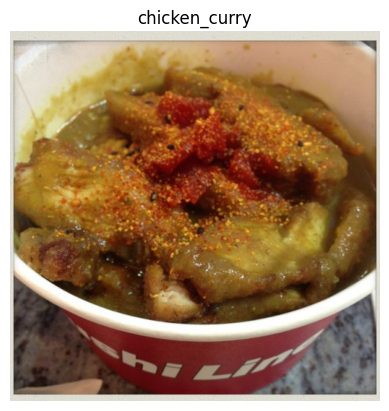

In [ ]:
import random
import os
img = view_random_image(train_dir, random.choice(class_names))

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [89]:
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)


In [90]:

test_data = test_datagen.flow_from_directory(test_dir,
                                             batch_size=128,
                                             target_size=(224, 224),
                                             )

Found 2500 images belonging to 10 classes.


In [ ]:
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense

In [ ]:
model_1 = tf.keras.Sequential([
    Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Conv2D(10, 3, activation='relu'),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation='softmax')
])

model_1.compile(
    loss='categorical_crossentropy',
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

In [ ]:
model_2 = tf.keras.Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(),
  Flatten(),
  Dense(10, activation='softmax')
])

model_2.compile(
    loss='categorical_crossentropy',
    optimizer=tf.keras.optimizers.SGD(),
    metrics=['accuracy']
)

history_2 = model_2.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))


In [ ]:
augmented_train_datagen = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=0.2,
                                             width_shift_range=0.2,
                                             height_shift_range=0.2,
                                             zoom_range=0.2,
                                             horizontal_flip=True)
train_data_augmented = augmented_train_datagen.flow_from_directory(train_dir,
                                                                   target_size=(224, 224),
                                                                   batch_size=128,
                                                                   class_mode='categorical')

Found 7500 images belonging to 10 classes.


In [ ]:
model_2.evaluate(test_data)

In [ ]:
def load_and_preprocess_img(filename, img_shape=224):
  img = tf.io.read_file(filename)
  img = tf.image.decode_jpeg(img)
  img = tf.image.resize(img, size=[img_shape, img_shape])
  img = img/255.
  return img

In [ ]:
def model_predict(model, image_filename, img_shape):
  img = load_and_preprocess_img(image_filename, img_shape)
  preds = model.predict(tf.expand_dims(img, axis=0))
  global class_names
  print(class_names[tf.argmax(preds)], preds)

In [ ]:
model_3 = tf.keras.Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(10, activation='softmax')
])

model_3.compile(
    loss='categorical_crossentropy',
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

history_3 = model_3.fit(train_data_augmented,
                        epochs=40,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/40
59/59 [==============================] - 125s 2s/step - loss: 2.2236 - accuracy: 0.1763 - val_loss: 2.0784 - val_accuracy: 0.2520
Epoch 2/40
59/59 [==============================] - 121s 2s/step - loss: 2.1081 - accuracy: 0.2437 - val_loss: 2.0148 - val_accuracy: 0.2864
Epoch 3/40
59/59 [==============================] - 120s 2s/step - loss: 2.0577 - accuracy: 0.2688 - val_loss: 2.0096 - val_accuracy: 0.2748
Epoch 4/40
59/59 [==============================] - 122s 2s/step - loss: 2.0535 - accuracy: 0.2732 - val_loss: 1.9685 - val_accuracy: 0.3064
Epoch 5/40
59/59 [==============================] - 119s 2s/step - loss: 2.0317 - accuracy: 0.2879 - val_loss: 1.9544 - val_accuracy: 0.3128
Epoch 6/40
59/59 [==============================] - 119s 2s/step - loss: 2.0370 - accuracy: 0.2785 - val_loss: 1.9249 - val_accuracy: 0.3292
Epoch 7/40
59/59 [==============================] - 120s 2s/step - loss: 2.0189 - accuracy: 0.2921 - val_loss: 1.9175 - val_accuracy: 0.3328
Epoch 8/40
59

In [ ]:
model_4 = tf.keras.Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(10, activation='softmax')
])

model_4.compile(
    loss='categorical_crossentropy',
    optimizer=tf.keras.optimizers.AdamW(),
    metrics=['accuracy']
)

history_4 = model_4.fit(train_data_augmented,
                        epochs=20,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/20
59/59 [==============================] - 127s 2s/step - loss: 2.2765 - accuracy: 0.1805 - val_loss: 2.1173 - val_accuracy: 0.2528
Epoch 2/20
59/59 [==============================] - 123s 2s/step - loss: 2.0897 - accuracy: 0.2560 - val_loss: 2.0027 - val_accuracy: 0.2736
Epoch 3/20
59/59 [==============================] - 117s 2s/step - loss: 2.0438 - accuracy: 0.2807 - val_loss: 1.9196 - val_accuracy: 0.3324
Epoch 4/20
59/59 [==============================] - 117s 2s/step - loss: 2.0059 - accuracy: 0.3013 - val_loss: 1.9911 - val_accuracy: 0.3028
Epoch 5/20
59/59 [==============================] - 117s 2s/step - loss: 1.9783 - accuracy: 0.3117 - val_loss: 1.8589 - val_accuracy: 0.3576
Epoch 6/20
59/59 [==============================] - 119s 2s/step - loss: 1.9679 - accuracy: 0.3213 - val_loss: 1.8499 - val_accuracy: 0.3584
Epoch 7/20
59/59 [==============================] - 117s 2s/step - loss: 1.9545 - accuracy: 0.3245 - val_loss: 1.8609 - val_accuracy: 0.3496
Epoch 8/20
59

In [15]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPool2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import AdamW
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [13]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Заморозка предварительно обученных слоев
for layer in base_model.layers:
    layer.trainable = False

# Добавление слоя Flatten и полносвязного слоя для классификации (10 классов)
x = Flatten()(base_model.output)
x = Dense(256, activation='relu')(x)  # Можно настроить количество нейронов
x = Dense(10, activation='softmax')(x)  # 10 классов, функция активации softmax

# Создание модели
model = Model(inputs=base_model.input, outputs=x)

# Компиляция модели с оптимизатором AdamW и функцией потерь categorical_crossentropy
optimizer = AdamW(learning_rate=0.0001, weight_decay=1e-4)  # Можно настроить learning rate и weight decay
model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [16]:
datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

In [25]:
train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

val_generator = datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

Found 6000 images belonging to 10 classes.
Found 500 images belonging to 10 classes.


In [27]:
model.fit(
    train_generator,
    epochs=20,  # Можно настроить количество эпох
    validation_data=val_generator,
)

Epoch 1/20
188/188 [==============================] - 107s 567ms/step - loss: 1.7804 - accuracy: 0.3815 - val_loss: 1.4755 - val_accuracy: 0.4820
Epoch 2/20
188/188 [==============================] - 101s 535ms/step - loss: 1.3625 - accuracy: 0.5482 - val_loss: 1.2200 - val_accuracy: 0.6080
Epoch 3/20
188/188 [==============================] - 98s 523ms/step - loss: 1.2424 - accuracy: 0.5907 - val_loss: 1.1965 - val_accuracy: 0.5800
Epoch 4/20
188/188 [==============================] - 100s 530ms/step - loss: 1.1687 - accuracy: 0.6128 - val_loss: 1.0921 - val_accuracy: 0.6320
Epoch 5/20
188/188 [==============================] - 99s 524ms/step - loss: 1.1097 - accuracy: 0.6297 - val_loss: 1.0396 - val_accuracy: 0.6800
Epoch 6/20
188/188 [==============================] - 98s 520ms/step - loss: 1.0597 - accuracy: 0.6478 - val_loss: 0.9971 - val_accuracy: 0.6480
Epoch 7/20
188/188 [==============================] - 101s 536ms/step - loss: 1.0233 - accuracy: 0.6610 - val_loss: 1.0738 - va

In [28]:
!wget https://upload.wikimedia.org/wikipedia/commons/thumb/2/2e/Ice_cream_with_whipped_cream%2C_chocolate_syrup%2C_and_a_wafer_%28cropped%29.jpg/1200px-Ice_cream_with_whipped_cream%2C_chocolate_syrup%2C_and_a_wafer_%28cropped%29.jpg

--2023-09-19 16:40:25--  https://upload.wikimedia.org/wikipedia/commons/thumb/2/2e/Ice_cream_with_whipped_cream%2C_chocolate_syrup%2C_and_a_wafer_%28cropped%29.jpg/1200px-Ice_cream_with_whipped_cream%2C_chocolate_syrup%2C_and_a_wafer_%28cropped%29.jpg
Resolving upload.wikimedia.org (upload.wikimedia.org)... 103.102.166.240, 2001:df2:e500:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|103.102.166.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 306444 (299K) [image/jpeg]
Saving to: ‘1200px-Ice_cream_with_whipped_cream,_chocolate_syrup,_and_a_wafer_(cropped).jpg’

1200px-Ice_cream_wi 100%[===================>] 299.26K  --.-KB/s    in 0.009s  

2023-09-19 16:40:26 (31.1 MB/s) - ‘1200px-Ice_cream_with_whipped_cream,_chocolate_syrup,_and_a_wafer_(cropped).jpg’ saved [306444/306444]



In [45]:
def load_and_preprocess_img(filename, img_shape=224):
  img = tf.io.read_file(filename)
  img = tf.image.decode_jpeg(img)
  img = tf.image.resize(img, size=[img_shape, img_shape])
  img = img/255.
  return img

In [46]:
img = '1200px-Ice_cream_with_whipped_cream,_chocolate_syrup,_and_a_wafer_(cropped).jpg'


In [47]:
imd_ice_cream = load_and_preprocess_img(img, 224)

In [65]:
import matplotlib.image as mpimg

In [73]:
def model_predict(model, img, class_names):
  preds = model.predict(tf.expand_dims(img, axis=0))
  plt.imshow(img)
  plt.title(f"Predictions:{class_names[np.argmax(max(preds))]}")
  print(class_names[np.argmax(preds[0])])

1/1 [==============================] - 0s 126ms/step
ice_cream


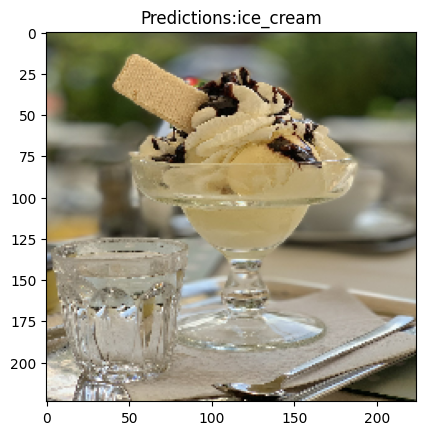

In [74]:
model_predict(model, imd_ice_cream, class_names)

In [63]:
!wget https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSRBOczuP01JJPep53M6c2Zy7qrpnTOcBAuVNDKgvL45A&s

/bin/bash: line 1: s: command not found
--2023-09-19 16:52:17--  https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSRBOczuP01JJPep53M6c2Zy7qrpnTOcBAuVNDKgvL45A
Resolving encrypted-tbn0.gstatic.com (encrypted-tbn0.gstatic.com)... 142.251.12.100, 142.251.12.102, 142.251.12.101, ...
Connecting to encrypted-tbn0.gstatic.com (encrypted-tbn0.gstatic.com)|142.251.12.100|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5825 (5.7K) [image/jpeg]
Saving to: ‘images?q=tbn:ANd9GcSRBOczuP01JJPep53M6c2Zy7qrpnTOcBAuVNDKgvL45A’

images?q=tbn:ANd9Gc 100%[===================>]   5.69K  --.-KB/s    in 0s      

2023-09-19 16:52:17 (51.9 MB/s) - ‘images?q=tbn:ANd9GcSRBOczuP01JJPep53M6c2Zy7qrpnTOcBAuVNDKgvL45A’ saved [5825/5825]



1/1 [==============================] - 0s 24ms/step
steak


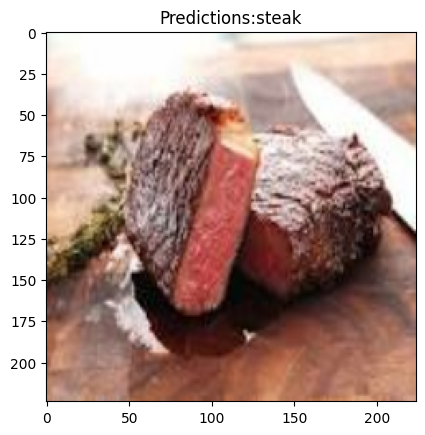

In [69]:
steak = 'images?q=tbn:ANd9GcSRBOczuP01JJPep53M6c2Zy7qrpnTOcBAuVNDKgvL45A'
steak = load_and_preprocess_img(steak, 224)
model_predict(model, steak, class_names)

In [72]:
model.save('final_model_bassed_on_vgg16.h5')

In [81]:
!wget https://img.freepik.com/premium-photo/classic-cheeseburger-with-beef-cheese-bacon-tomato-onion-lettuce-isolated-white-background_183587-963.jpg

--2023-09-19 17:44:36--  https://img.freepik.com/premium-photo/classic-cheeseburger-with-beef-cheese-bacon-tomato-onion-lettuce-isolated-white-background_183587-963.jpg
Resolving img.freepik.com (img.freepik.com)... 104.83.196.168, 2600:1413:b000:386::312e, 2600:1413:b000:397::312e
Connecting to img.freepik.com (img.freepik.com)|104.83.196.168|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 78249 (76K) [image/jpeg]
Saving to: ‘classic-cheeseburger-with-beef-cheese-bacon-tomato-onion-lettuce-isolated-white-background_183587-963.jpg’

classic-cheeseburge 100%[===================>]  76.42K   230KB/s    in 0.3s    

2023-09-19 17:44:37 (230 KB/s) - ‘classic-cheeseburger-with-beef-cheese-bacon-tomato-onion-lettuce-isolated-white-background_183587-963.jpg’ saved [78249/78249]



1/1 [==============================] - 0s 30ms/step
hamburger


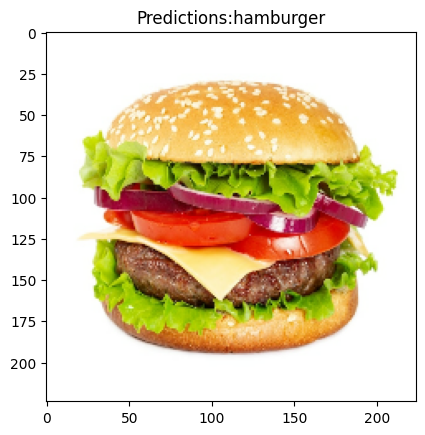

In [84]:
burger = 'classic-cheeseburger-with-beef-cheese-bacon-tomato-onion-lettuce-isolated-white-background_183587-963.jpg'
burger = load_and_preprocess_img(burger)
model_predict(model, burger, class_names)

In [91]:
model.evaluate(test_data)

20/20 [==============================] - 34s 946ms/step - loss: 0.8822 - accuracy: 0.7000


[0.8822435736656189, 0.699999988079071]